- Prepare rules for the all the data sets 


1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values


2) Change the minimum length in apriori algorithm


3) Visulize the obtained rules using different plots 

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
movies=pd.read_csv('my_movies.csv')

In [3]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# EDA

In [4]:
movies.shape

(10, 15)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
movies.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

- v3 and v5 has null value,but we dont need that columns.so droping v1 to v5 columns

In [7]:
movies=movies.drop(['V1', 'V2', 'V3', 'V4', 'V5'], axis = 1)
movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [8]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


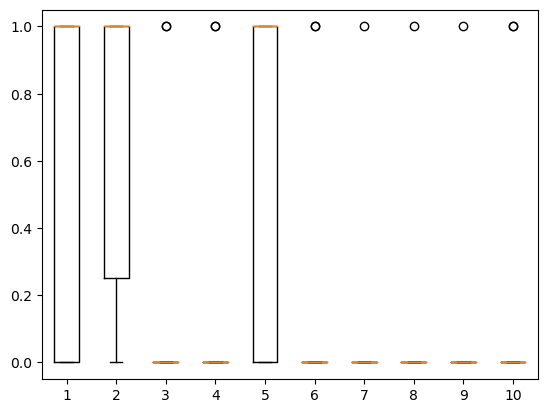

In [9]:
#outliers detection
plt.boxplot(movies)
plt.show();

- since all columns are having only 2 values no need for outlier and skew treatment

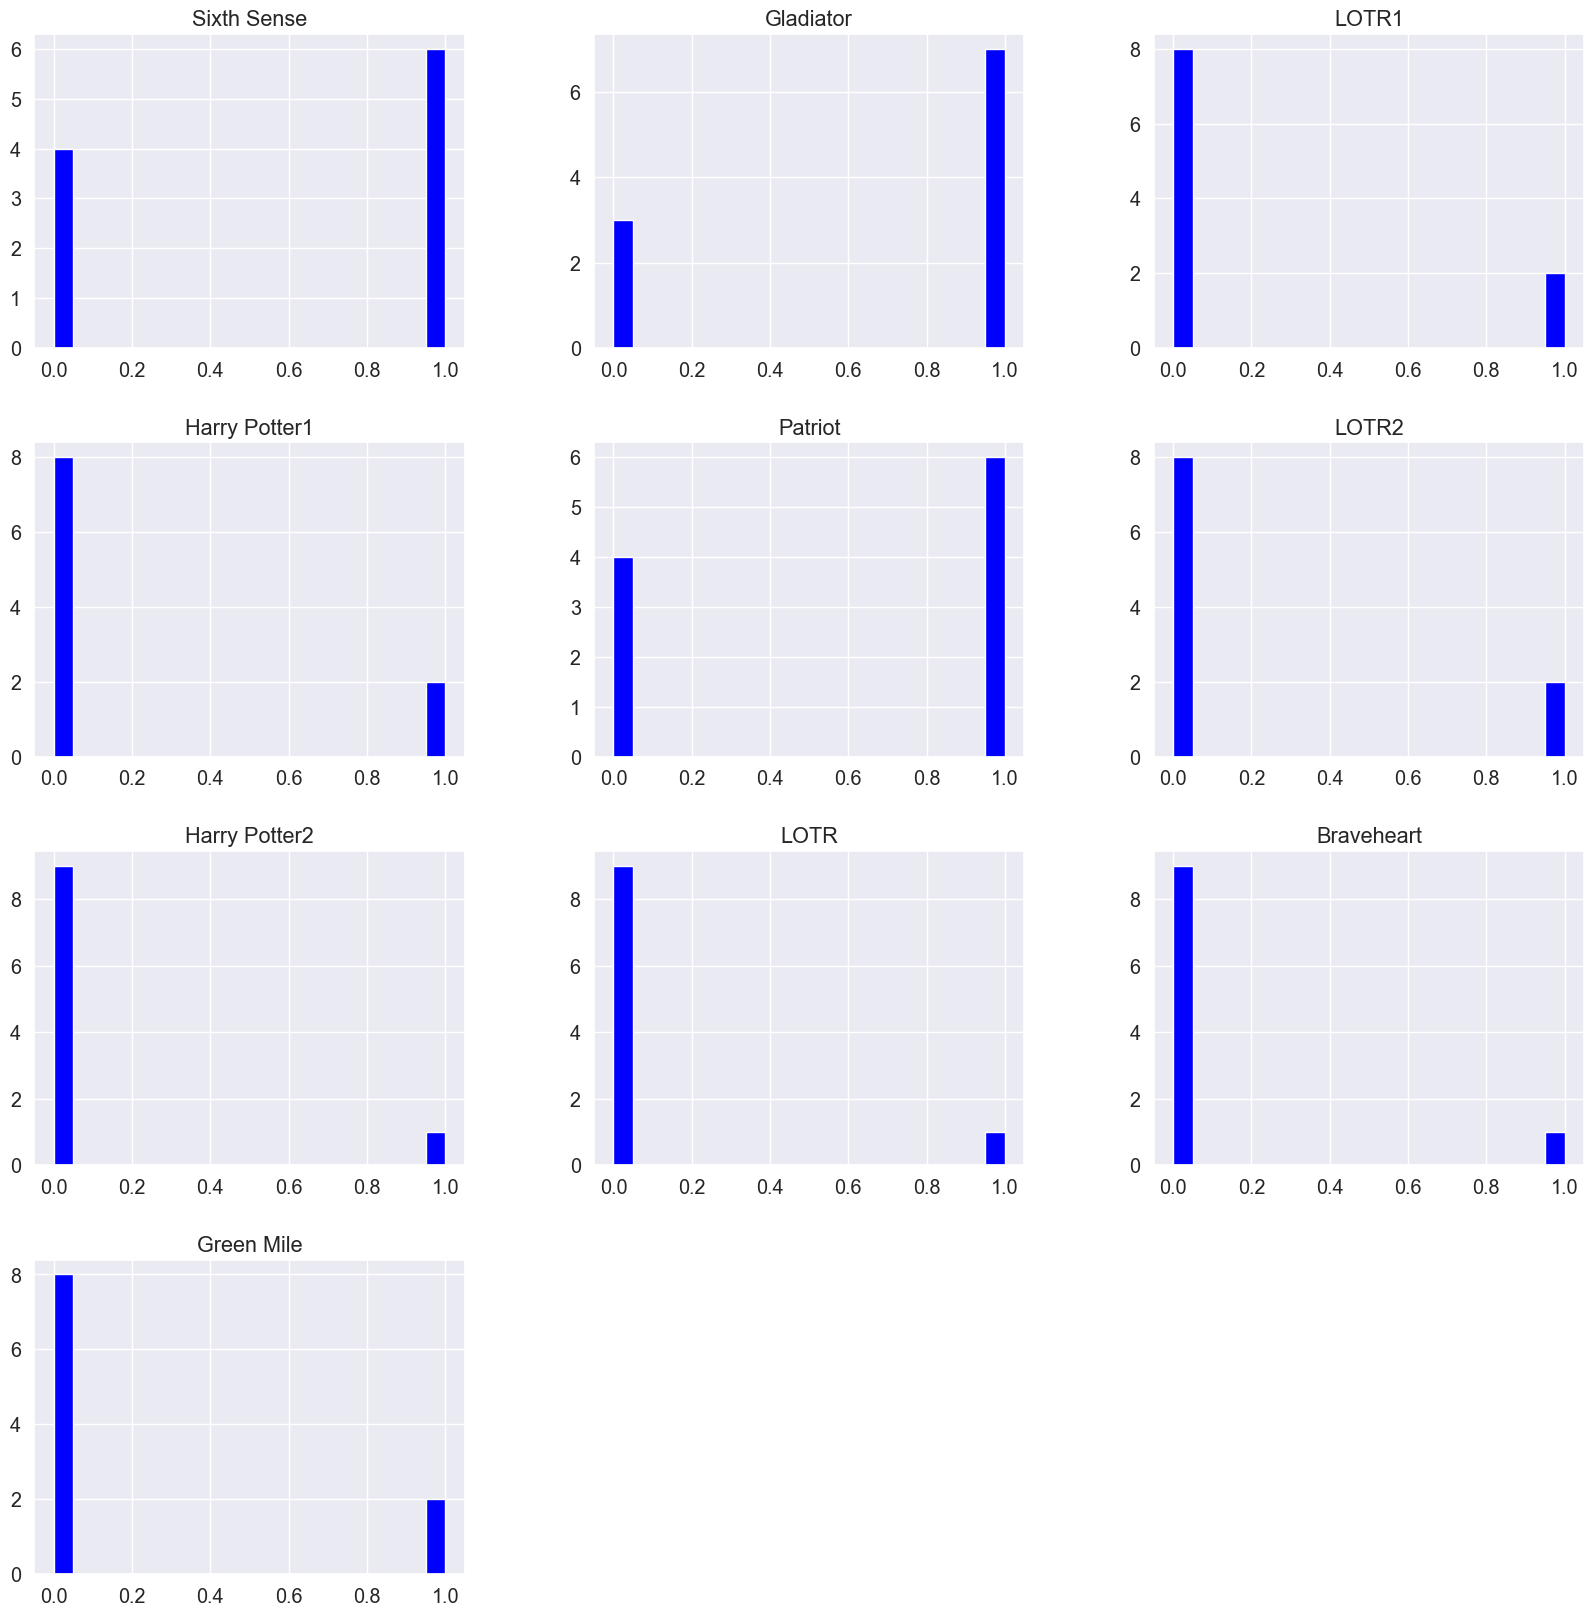

In [10]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=movies.hist(bins=20,color='blue' )

In [11]:
# ploting barplot for all columns in dataframe using for loop
movie_count = []
col_names = movies.columns

for name in col_names:
    movie_count.append(movies[name].value_counts()[1])


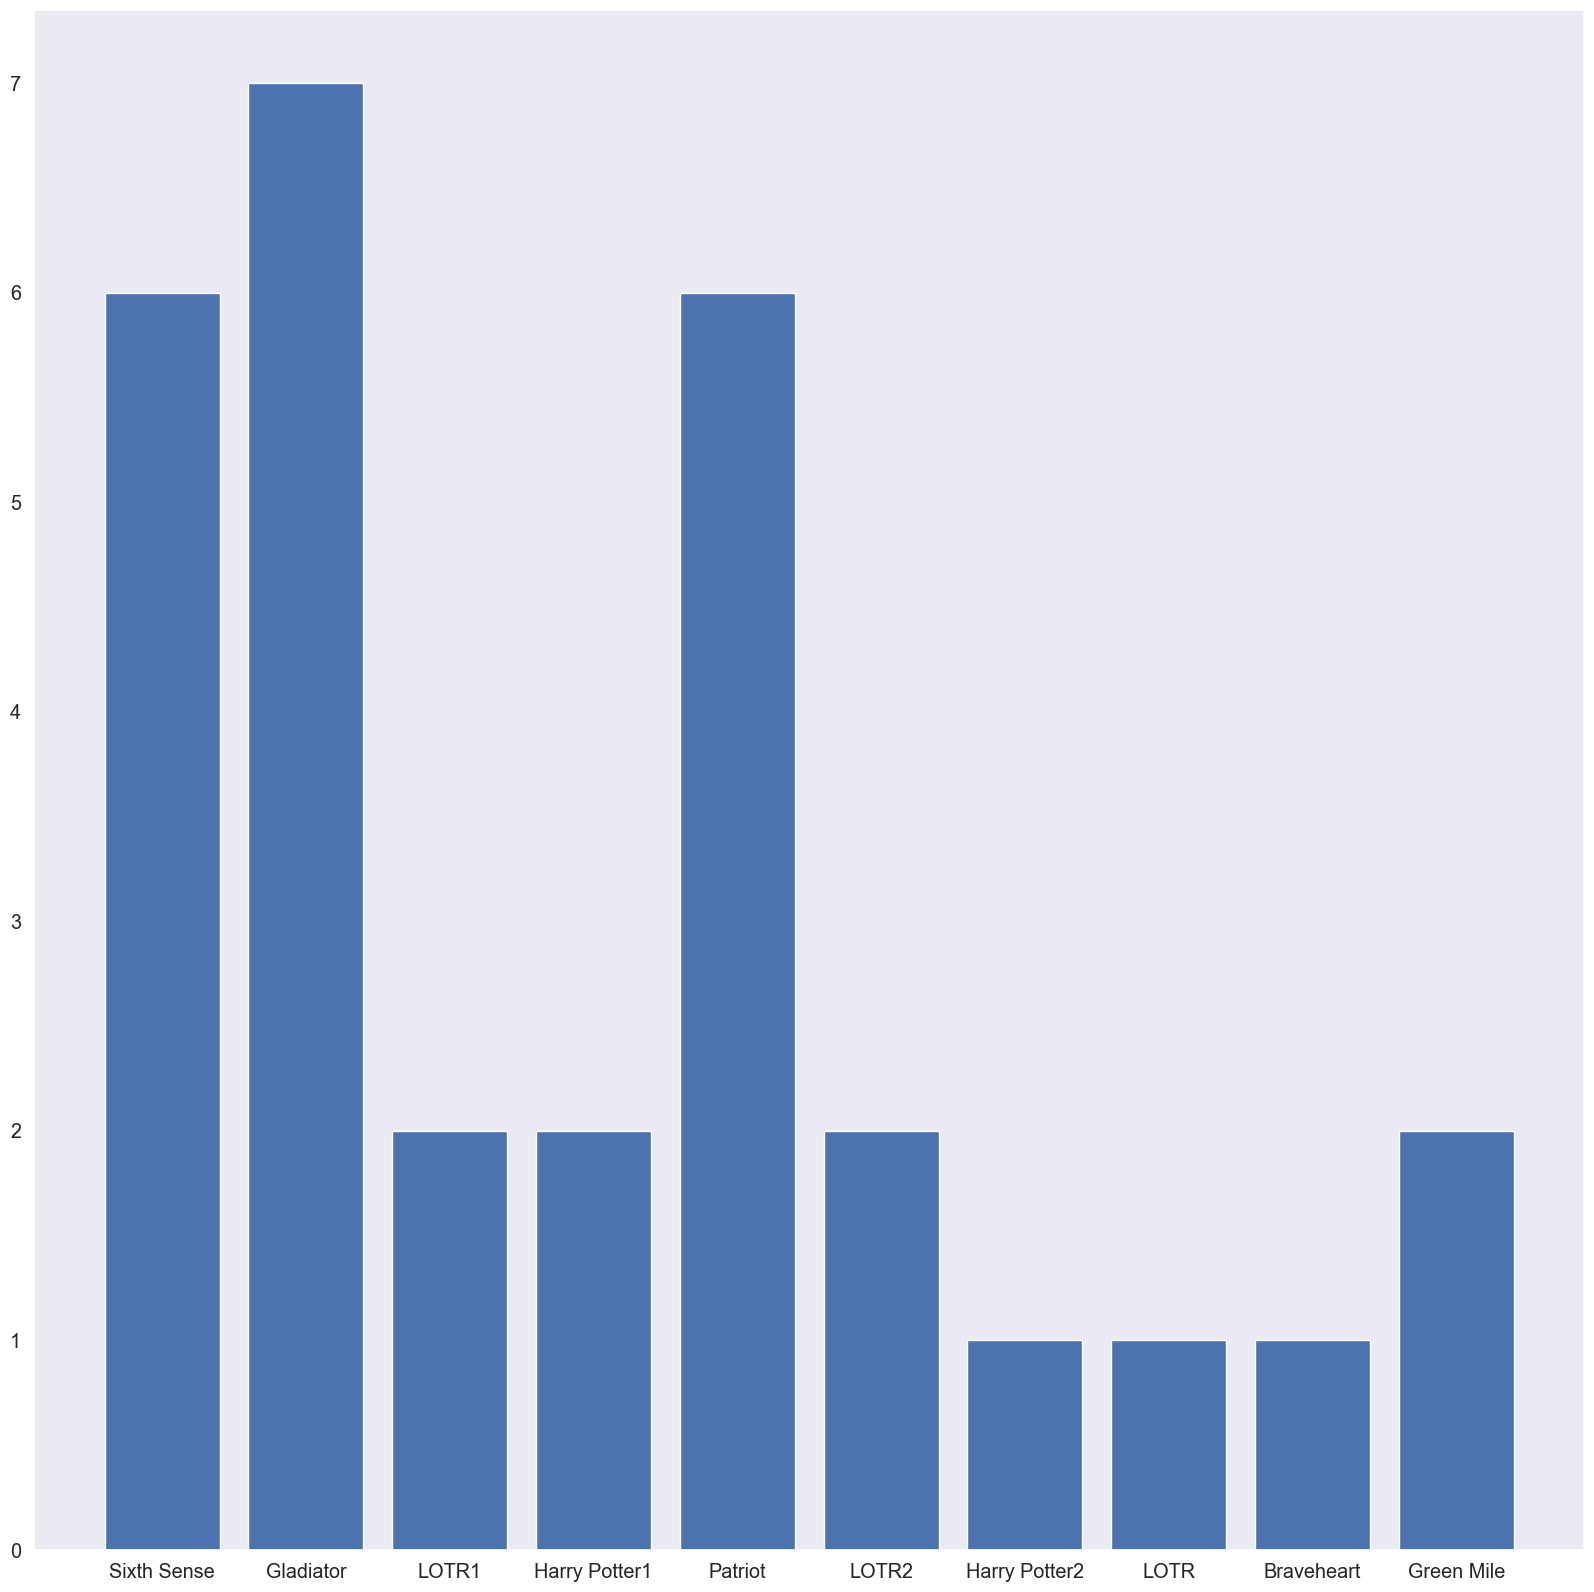

In [12]:
plt.bar(col_names,movie_count)
plt.show();

- Count of Gladiator is very high whereas harry potter2,lotr,braveheart  has lowest count

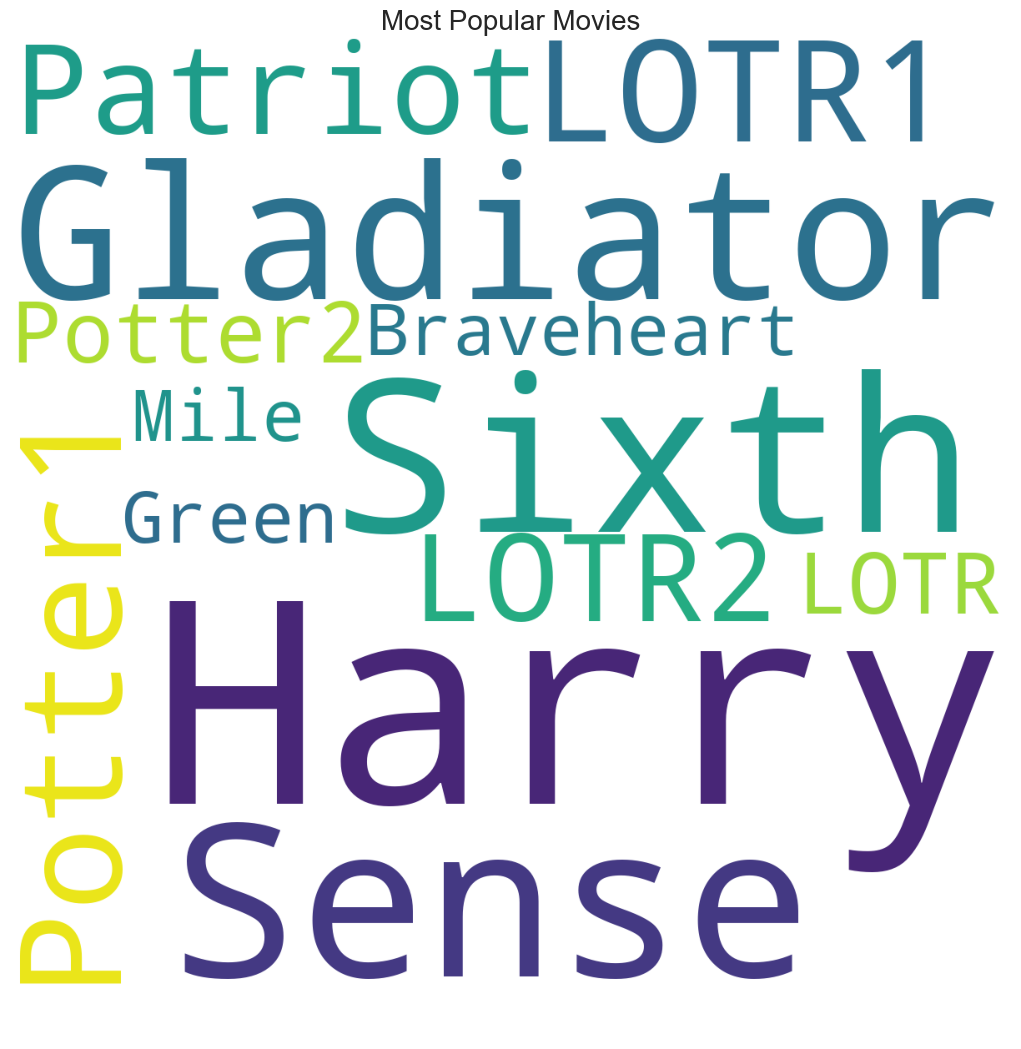

In [13]:
# Word cloud of most frequent movies

from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (13, 13)

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(movies))
plt.imshow(wordcloud)

plt.axis('off')
plt.title('Most Popular Movies',fontsize = 20)
plt.show();

In [14]:
# Most popular movie is Harry potter

# Apriori Algorithm for min_support of 10%

In [15]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(movies, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\PallaviJadhav\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


- their are 53 rows of columns combinations(ie one,two,three,four,five...etc combinations) form for support with 10%

In [39]:
#Association Rule with minimum threshold level for 'lift' of 80%
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8) 
rules.sort_values('lift',ascending = False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Green Mile),"(LOTR1, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(LOTR1),"(Harry Potter1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


- Lift Ratio > 1 is a good influential rule in selecting the associated transactions

- with lift of 80% we got 246 association combinations of movies

In [17]:
rule1=rules.iloc[:,:2]
rule1

,antecedents,consequents
0,(Gladiator),(Sixth Sense)
1,(Sixth Sense),(Gladiator)
2,(LOTR1),(Sixth Sense)
3,(Sixth Sense),(LOTR1)
4,(Harry Potter1),(Sixth Sense)
...,...,...
241,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)"
242,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)"
243,(Green Mile),"(LOTR1, Harry Potter1, LOTR2, Sixth Sense)"
244,(LOTR1),"(Harry Potter1, Sixth Sense, LOTR2, Green Mile)"


In [18]:
# deleting duplicate rows
rule1.duplicated().sum()

0

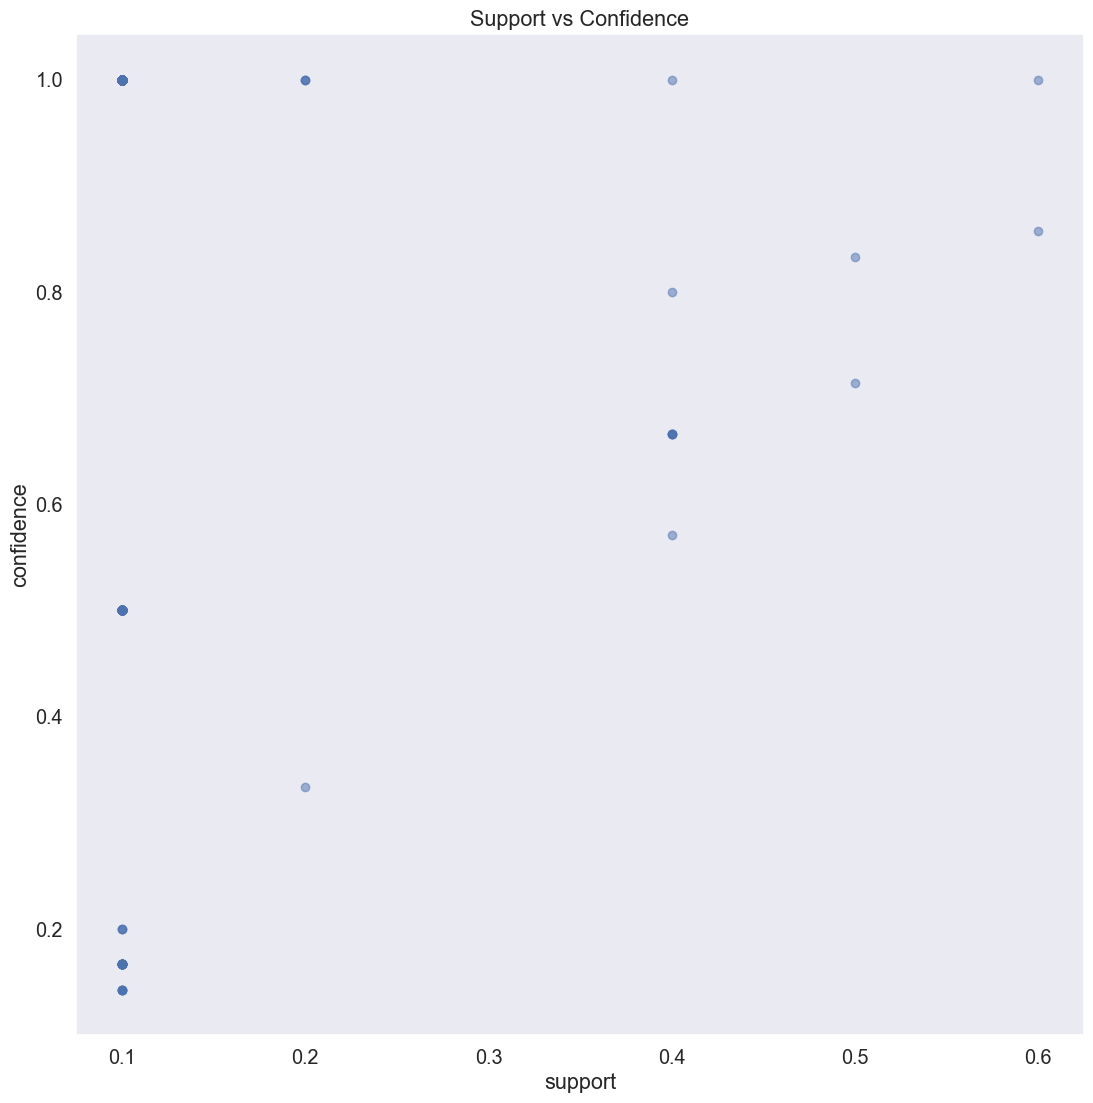

In [19]:
# visualization with support and confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show();

In [20]:
# Association Rule with minimum threshold level of 80% for confidence
rules_1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8) 
rules_1.sort_values('confidence',ascending = False)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
123,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
124,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [21]:
# with support 10% and confidence 80% we get 128 movies association

In [22]:
# confidence of 90%
rules_10 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9) 
rules_10.sort_values('confidence',ascending = False)
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [23]:
#with 90% confidence we get 125 movies association

# Apriori Algorithm for min_support of 20%

In [24]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets_2 = apriori(movies, min_support=0.2, use_colnames=True)
frequent_itemsets_2

C:\Users\PallaviJadhav\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [25]:
# Association Rule with minimum threshold level  for 'lift' of 80%
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=0.8) 
rules_2.sort_values('lift',ascending = False)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


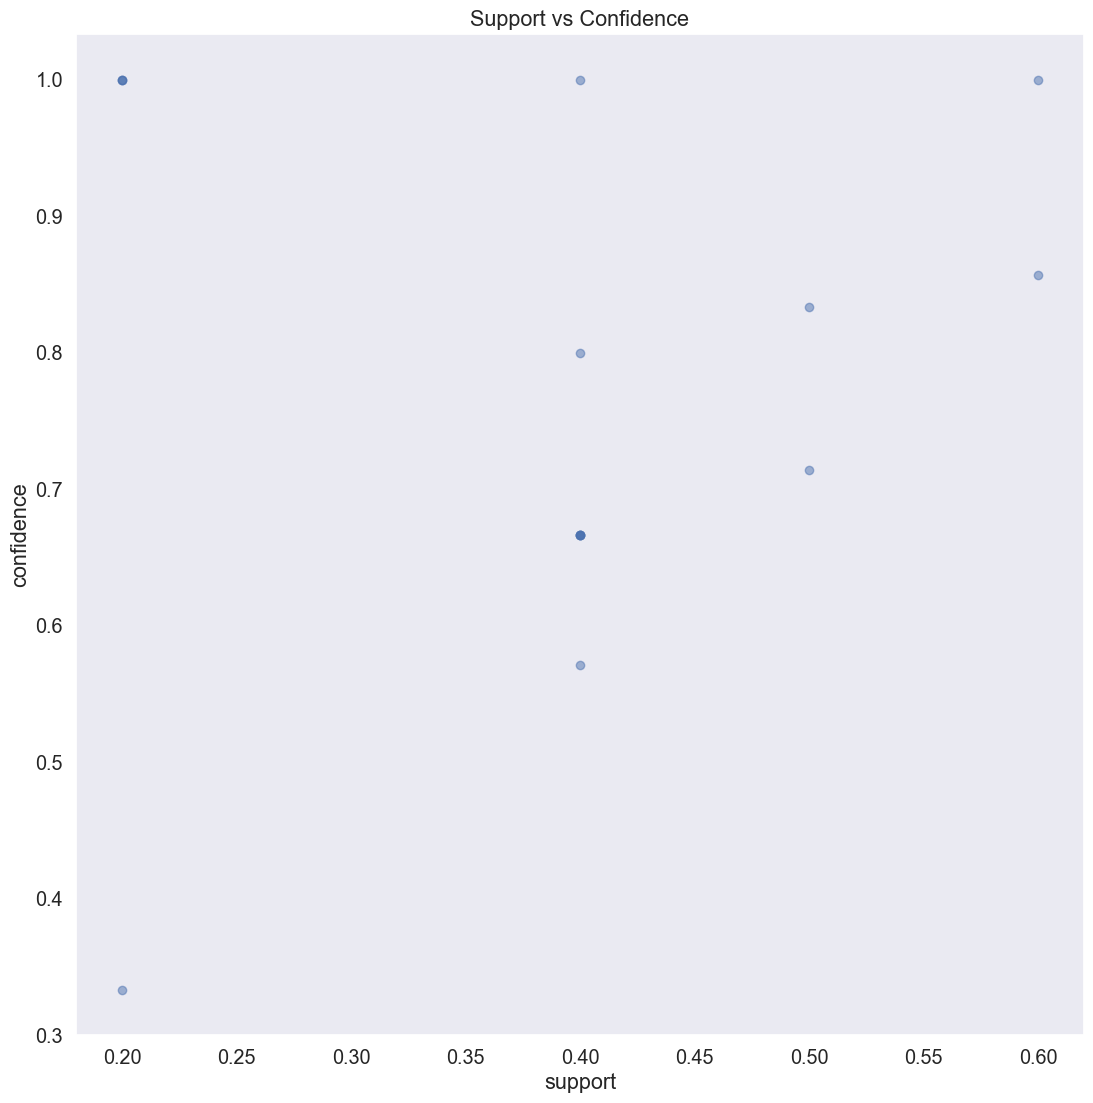

In [26]:
plt.scatter(rules_2['support'], rules_2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show();

In [27]:
# Association Rule with minimum threshold level of 80% for confidence
rules_3 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.8) 
rules_3.sort_values('confidence',ascending = False)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [28]:
# confidence of 90%
rules_30 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.9) 
rules_30.sort_values('confidence',ascending = False)
rules_30

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


# Apriori Algorithm for min_support  with 30%

In [29]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets_3 = apriori(movies, min_support=0.3, use_colnames=True)
frequent_itemsets_3

C:\Users\PallaviJadhav\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Patriot, Sixth Sense)"


In [30]:
#  Association Rule with minimum threshold level for 'lift' of 80%
rules_3 = association_rules(frequent_itemsets_3, metric="lift", min_threshold=0.8) 
rules_3.sort_values('lift',ascending = False)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


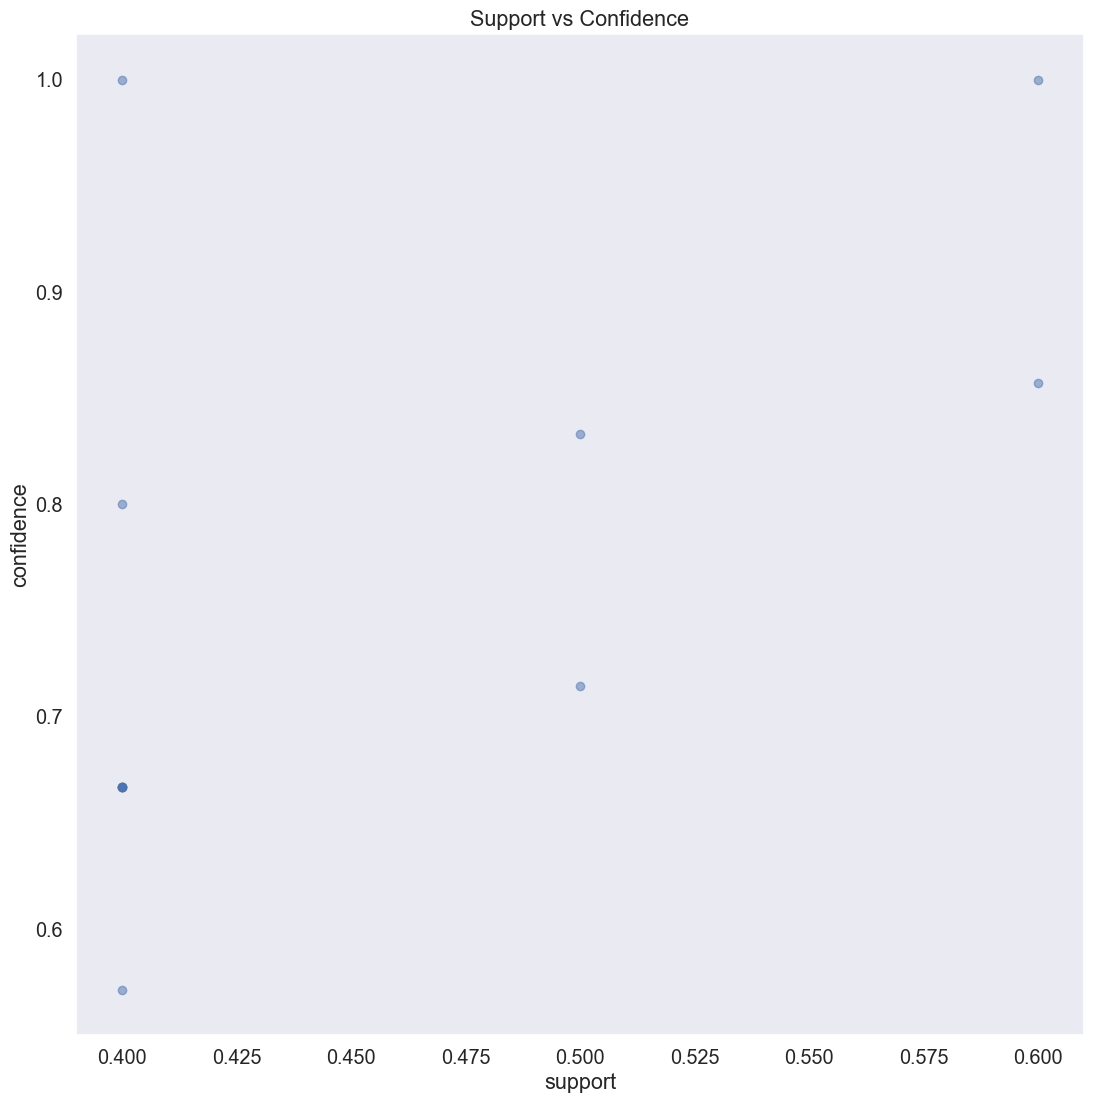

In [31]:
plt.scatter(rules_3['support'], rules_3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show();

In [32]:
# Association Rule with minimum threshold level of 80% for confidence
rules_4 = association_rules(frequent_itemsets_3, metric="confidence", min_threshold=0.8) 
rules_4.sort_values('confidence',ascending = False)
rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [33]:
# Association Rule with minimum threshold level of 90% for confidence
rules_5 = association_rules(frequent_itemsets_3, metric="confidence", min_threshold=0.9) 
rules_5.sort_values('confidence',ascending = False)
rules_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


- with support 30% and confidence 90%, the associated movies are Patriot and Gladiator.